# Part-of-Speech Tagging

Part-of-speech tagging is the task of identifying the grammatical classes of words in a sentence. In this class, we will use the concept of n-grams to help us automatically identify grammatical classes.

## Exercise 1

In the sentences below, identify the *nouns*, *verbs*, *adjectives*, and *adverbs*:

1. Today I woke up serenely and saw that it was a beautiful and calm day.
1. The mutation of fungi is capable of controlling people's minds!
1. Every day, the morning Sun comes and challenges us!
1. It is no use trying to make an automatic system that does something we do not understand the result of!

## Exercise 2

There are many words that always have the same PoS definition - maybe the word Sun, for example, is always a noun. However, there are others that can change their meaning according to the context, such as "house": "I live in a house" (noun), versus "I like house music" (adjective), versus "The museums house a collection of ancient artifacts" (verb).

Because of that, it is important to use context to determine the

Recall that our language model context model was:

$$
𝑃(𝑤_𝑛∣𝑤_{𝑛−1}, w_{n-2}, \cdots, w_{n-L})
$$

Now, we can make a small change and use:

$$
𝑃(\text{tag}∣w_n, 𝑤_{𝑛−1}, w_{n-2}, \cdots, w_{n-L})
$$

Similarly to the language models, we can use a fallback n-gram strategy to make a reasonable model. But, first, we will need to download a corpus:

In [1]:
import nltk
nltk.download('brown')
from nltk.corpus import brown

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


A corpus is a collection of texts. The [Brown corpus](https://en.wikipedia.org/wiki/Brown_Corpus) has many phrases, with categories and word-level tags for part-of-speech. This was done manually by a team of brave taggers. Here are some highlights on how to use the [Brown corpus in NLTK](https://www.nltk.org/book/ch02.html):

In [2]:
# This is a list of categories in the Brown corpus
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [3]:
# This is a list of sentences in a category:
brown.sents(categories='hobbies')
# Each sentence is a list of words

[['Too', 'often', 'a', 'beginning', 'bodybuilder', 'has', 'to', 'do', 'his', 'training', 'secretly', 'either', 'because', 'his', 'parents', "don't", 'want', 'sonny-boy', 'to', '``', 'lift', 'all', 'those', 'old', 'barbell', 'things', "''", 'because', '``', "you'll", 'stunt', 'your', 'growth', "''", 'or', 'because', 'childish', 'taunts', 'from', 'his', 'schoolmates', ',', 'like', '``', 'Hey', 'lookit', 'Mr.', 'America', ';', ';'], ['whaddya', 'gonna', 'do', 'with', 'all', 'those', 'muscles', '(', 'of', 'which', 'he', 'has', 'none', 'at', 'the', 'time', ')', "''", '?', '?'], ...]

In [13]:
# print 10 different sentences from the hobbies category
for i in range(10):
    print(brown.sents(categories='hobbies')[i])



['Too', 'often', 'a', 'beginning', 'bodybuilder', 'has', 'to', 'do', 'his', 'training', 'secretly', 'either', 'because', 'his', 'parents', "don't", 'want', 'sonny-boy', 'to', '``', 'lift', 'all', 'those', 'old', 'barbell', 'things', "''", 'because', '``', "you'll", 'stunt', 'your', 'growth', "''", 'or', 'because', 'childish', 'taunts', 'from', 'his', 'schoolmates', ',', 'like', '``', 'Hey', 'lookit', 'Mr.', 'America', ';', ';']
['whaddya', 'gonna', 'do', 'with', 'all', 'those', 'muscles', '(', 'of', 'which', 'he', 'has', 'none', 'at', 'the', 'time', ')', "''", '?', '?']
['After', 'all', ',', 'a', "guy's", 'gotta', 'have', 'a', 'little', 'ego', '!', '!']
['Therefore', "it's", 'a', 'genuine', 'pleasure', 'to', 'tell', 'you', 'about', 'an', 'entirely', 'happy', 'bodybuilder', 'who', 'has', 'never', 'had', 'to', 'train', 'in', 'secret', 'has', 'never', 'heard', 'one', 'unkind', 'word', 'from', 'his', 'parents', 'and', 'never', 'has', 'been', 'taunted', 'by', 'his', 'schoolmates', '!', '!']

In [4]:
# This is a list of *tagged* sentences in a category:
brown.tagged_sents(categories='hobbies')
# You can find the meaning of the tags by looking at the Wikipedia article: https://en.wikipedia.org/wiki/Brown_Corpus

[[('Too', 'QL'), ('often', 'RB'), ('a', 'AT'), ('beginning', 'VBG'), ('bodybuilder', 'NN'), ('has', 'HVZ'), ('to', 'TO'), ('do', 'DO'), ('his', 'PP$'), ('training', 'NN'), ('secretly', 'RB'), ('either', 'CC'), ('because', 'CS'), ('his', 'PP$'), ('parents', 'NNS'), ("don't", 'DO*'), ('want', 'VB'), ('sonny-boy', 'NN'), ('to', 'TO'), ('``', '``'), ('lift', 'VB'), ('all', 'ABN'), ('those', 'DTS'), ('old', 'JJ'), ('barbell', 'NN'), ('things', 'NNS'), ("''", "''"), ('because', 'CS'), ('``', '``'), ("you'll", 'PPSS+MD'), ('stunt', 'VB'), ('your', 'PP$'), ('growth', 'NN'), ("''", "''"), ('or', 'CC'), ('because', 'CS'), ('childish', 'JJ'), ('taunts', 'NNS'), ('from', 'IN'), ('his', 'PP$'), ('schoolmates', 'NNS'), (',', ','), ('like', 'CS'), ('``', '``'), ('Hey', 'UH'), ('lookit', 'VB+IN'), ('Mr.', 'NP'), ('America', 'NP'), (';', '.'), (';', '.')], [('whaddya', 'WDT+BER+PP'), ('gonna', 'VBG+TO'), ('do', 'DO'), ('with', 'IN'), ('all', 'ABN'), ('those', 'DTS'), ('muscles', 'NNS'), ('(', '('), ('o

**TASK**

Make code to count the proportion of each tag throughout the corpus. If you finish this too quickly, subdivide your count by category.

In [ ]:
# count the proportion of each tag throughout the corpus. subdivide your count by category.

count = {}
for category in brown.categories():
    for sent in brown.tagged_sents(categories=category):
        for word, tag in sent:
            count[tag] = count.get(tag, 0) + 1 # increment the count for the tag

# normalize the counts
total = sum(count.values())
for tag in count:
    count[tag] /= total

print(count)



{'NP': 0.029690180435276853, 'VBD': 0.02253460237411212, 'PPL': 0.0010618399024450737, 'PPS': 0.015719192002700673, 'MD': 0.010705378610944616, 'VB': 0.02901587334394312, '.': 0.05222047688926551, 'BEDZ': 0.008444770546128461, 'RB': 0.03140221427636429, 'JJ': 0.055139890732970945, 'IN': 0.10382176246477758, 'PPO': 0.00962889858007978, 'DOD*': 0.00034619597792613107, 'AT': 0.08436072587479074, 'NN': 0.13130472824476916, 'WPS': 0.0033792861128908915, 'CS': 0.01906919785875204, 'HVD': 0.0042154958008666955, 'VBN': 0.02513451694465687, ',': 0.0500830181399803, 'PPS+MD': 0.00012401049955562904, 'HV': 0.003382730848989659, 'BEN': 0.002127124540988915, 'VBG': 0.0154091657538116, 'CC': 0.03248213904332789, 'ABN': 0.0025921639143225237, 'DT': 0.007713625309165065, 'RP': 0.005174854804373437, '*': 0.00396403006565667, 'PP$': 0.014529896864601204, 'NNS': 0.04745985160076886, 'QL': 0.00752244245568347, 'PN': 0.002215826495532177, 'JJT': 0.0008654899448153277, 'BE': 0.005477130397040283, 'TO': 0.01

In [23]:
import pandas as pd

# create a DataFrame from the count dictionary
df = pd.DataFrame.from_dict(count, orient='index', columns=['proportion'])
df = df.sort_values(by='proportion', ascending=False)
df

,proportion
NN,1.313047e-01
IN,1.038218e-01
AT,8.436073e-02
JJ,5.513989e-02
.,5.222048e-02
...,...
PPSS+HV-TL,8.611840e-07
WDT+BEZ-TL,8.611840e-07
FW-OD-NC,8.611840e-07
FW-PPSS+HV,8.611840e-07


In [ ]:
# print the 3 most common tags in each category
for category in brown.categories():
    count = {}
    for sent in brown.tagged_sents(categories=category):
        for word, tag in sent:
            count[tag] = count.get(tag, 0) + 1
    total = sum(count.values())
    for tag in count:
        count[tag] /= total
    print(category, sorted(count.items(), key=lambda x: -x[1])[:3]) # sort by the second element of the tuple (the count) in reverse order

adventure [('NN', 0.11610567909780509), ('IN', 0.08520088835049465), ('AT', 0.07976406795304433)]
belles_lettres [('NN', 0.1259416739843786), ('IN', 0.11024518186439895), ('AT', 0.08606784674400333)]
editorial [('NN', 0.12458606583988052), ('IN', 0.1007077462502435), ('AT', 0.08621193428998117)]
fiction [('NN', 0.11410758089008294), ('IN', 0.0877818011914496), ('AT', 0.07941537203597711)]
government [('NN', 0.1408645549581414), ('IN', 0.12259509106208195), ('AT', 0.08152088651824807)]
hobbies [('NN', 0.15137531119072195), ('IN', 0.10432934604408282), ('AT', 0.0843524196976137)]
humor [('NN', 0.11832219405392948), ('IN', 0.08877621571790735), ('AT', 0.07628485826227241)]
learned [('NN', 0.16050536593947923), ('IN', 0.11961756685432794), ('AT', 0.09251847290640394)]
lore [('NN', 0.13333756425715554), ('IN', 0.10946608763452072), ('AT', 0.09008241235187989)]
mystery [('NN', 0.1130157952736623), ('IN', 0.08207245185327712), ('.', 0.0756004128111389)]
news [('NN', 0.13089484257215028), ('IN

## Exercise 3

Suppose we have no idea how to choose a PoS tag for any word. Our best guess is to pick one. For example, in the code below, we tag all words as qualifiers (QL). As we can see from the evaluation process, this is not a very accurate method:

In [26]:
from nltk.tag import DefaultTagger
default_tagger = DefaultTagger('NN')
sentence = brown.sents(categories='editorial')[0]
sentence_tagged = default_tagger.tag(sentence)
sentence_ground_truth = brown.tagged_sents(categories='editorial')[0]
print(sentence_tagged)
print(sentence_ground_truth)
accuracy = default_tagger.accuracy([sentence_ground_truth])
print(f'Accuracy: {accuracy}')

[('Assembly', 'NN'), ('session', 'NN'), ('brought', 'NN'), ('much', 'NN'), ('good', 'NN')]
[('Assembly', 'NN-HL'), ('session', 'NN-HL'), ('brought', 'VBD-HL'), ('much', 'AP-HL'), ('good', 'NN-HL')]
Accuracy: 0.0


1. Change the evaluation process above to calculate accuracy over all the 'editorial' category of the Brown corpus
1. Change the default tag to the most common tag you have found in Exercise 2. What is your change in accuracy?

## Exercise 4

NLTK also comes with Unigram taggers. These taggers use $L=0$ in the context, that is, they always tag a word in the same way.

The Unigram taggers requires training data. In the example below, we use the tagged sentences from the "hobbies" category for that.

Of course, there is a change that the word we want does not appear in the training data. In this case, what is the best alternative? Well, we can choose the most common tag in the dataset - which is what we had been doing with the default tagger. This strategy is called "backoff".

In [25]:
from nltk.tag import UnigramTagger

train_category = 'hobbies'

unigram_tagger = UnigramTagger(brown.tagged_sents(categories=train_category), backoff=default_tagger)

# test the tagger

test_category = 'news'

index = 2

sentence = brown.sents(categories=test_category)[index]
sentence_tagged = unigram_tagger.tag(sentence)

sentence_ground_truth = brown.tagged_sents(categories=test_category)[index]
print(sentence_tagged)
print(sentence_ground_truth)
accuracy = unigram_tagger.accuracy([sentence_ground_truth])
print(f'Accuracy: {accuracy}')



[('The', 'AT'), ('September-October', 'NN'), ('term', 'NN'), ('jury', 'NN'), ('had', 'HVD'), ('been', 'BEN'), ('charged', 'VBN'), ('by', 'IN'), ('Fulton', 'NN'), ('Superior', 'NN'), ('Court', 'NN-TL'), ('Judge', 'NN-TL'), ('Durwood', 'NN'), ('Pye', 'NN'), ('to', 'TO'), ('investigate', 'NN'), ('reports', 'VBZ'), ('of', 'IN'), ('possible', 'JJ'), ('``', '``'), ('irregularities', 'NNS'), ("''", "''"), ('in', 'IN'), ('the', 'AT'), ('hard-fought', 'NN'), ('primary', 'JJ'), ('which', 'WDT'), ('was', 'BEDZ'), ('won', 'VBD'), ('by', 'IN'), ('Mayor-nominate', 'NN'), ('Ivan', 'NN'), ('Allen', 'NP-TL'), ('Jr.', 'NP'), ('.', '.')]
[('The', 'AT'), ('September-October', 'NP'), ('term', 'NN'), ('jury', 'NN'), ('had', 'HVD'), ('been', 'BEN'), ('charged', 'VBN'), ('by', 'IN'), ('Fulton', 'NP-TL'), ('Superior', 'JJ-TL'), ('Court', 'NN-TL'), ('Judge', 'NN-TL'), ('Durwood', 'NP'), ('Pye', 'NP'), ('to', 'TO'), ('investigate', 'VB'), ('reports', 'NNS'), ('of', 'IN'), ('possible', 'JJ'), ('``', '``'), ('irre

In [32]:
# test for all categories
accuracies = []
for category in brown.categories():
    accuracy = unigram_tagger.accuracy(brown.tagged_sents(categories=category))
    accuracies.append(accuracy)
    print(f'Accuracy for {category}: {accuracy}')


Accuracy for adventure: 0.8020103256323728
Accuracy for belles_lettres: 0.8176329897860147
Accuracy for editorial: 0.8073339393545874
Accuracy for fiction: 0.8111201962387572
Accuracy for government: 0.8188741674629548
Accuracy for hobbies: 0.9327463719715829
Accuracy for humor: 0.8115694860566951
Accuracy for learned: 0.832567294159043
Accuracy for lore: 0.8217662898122376
Accuracy for mystery: 0.809214784236212
Accuracy for news: 0.7805756111144261
Accuracy for religion: 0.8153252620624889
Accuracy for reviews: 0.7911998820754716
Accuracy for romance: 0.809902602039359
Accuracy for science_fiction: 0.8144436765722184


Train the Unigram tagger in the 'hobbies' category. Then, test it in sentences of each category.

1. What do you observe in the results?
1. Does this phenomenon happen for any category chosen for training?
1. Make an experiment to find out if this phenomenon is due to train and test being from the same category, of if it is due to they containing strictly the same sentences.

## Exercise 5

We can also use n-gram taggers:

In [30]:
from nltk import NgramTagger

train_category = 'news'

bigram_tagger = NgramTagger(n=2, train=brown.tagged_sents(categories=train_category), backoff=unigram_tagger)

test_category = 'news'

sentence = brown.sents(categories=test_category)[0]
sentence_tagged = bigram_tagger.tag(sentence)
sentence_ground_truth = brown.tagged_sents(categories=test_category)[0]
print(sentence_tagged)
print(sentence_ground_truth)
accuracy = bigram_tagger.accuracy([sentence_ground_truth])
print(f'Accuracy: {accuracy}')


[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')]
[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')]
Accuracy: 1.0


In [33]:
# test for all categories
accuracies = []
for category in brown.categories():
    accuracy = bigram_tagger.accuracy(brown.tagged_sents(categories=category))
    accuracies.append(accuracy)
    print(f'Accuracy for {category}: {accuracy}')

Accuracy for adventure: 0.8308817167084883
Accuracy for belles_lettres: 0.8377836576235153
Accuracy for editorial: 0.8393286150249983
Accuracy for fiction: 0.8366283144492466
Accuracy for government: 0.8457435429353795
Accuracy for hobbies: 0.9369117736353149
Accuracy for humor: 0.8355381424291312
Accuracy for learned: 0.8459601513019
Accuracy for lore: 0.8431445434682091
Accuracy for mystery: 0.8420997393692385
Accuracy for news: 0.9678779561230781
Accuracy for religion: 0.8352750069798726
Accuracy for reviews: 0.8118366745283019
Accuracy for romance: 0.8417497357973208
Accuracy for science_fiction: 0.8398064961990325


In [43]:
n_list = [1, 2, 3, 4, 5]
accuracies = []
train_category = 'news'
test_categories = ['news', 'editorial', 'reviews', 'religion', 'hobbies', 'lore', 'belles_lettres', 'government', 'learned', 'fiction', 'mystery', 'science_fiction', 'adventure', 'romance', 'humor']
all_accuracies = {}
for test_category in test_categories:
    accuracies = []
    for n in n_list:
        tagger = NgramTagger(n=n, train=brown.tagged_sents(categories=train_category), backoff=unigram_tagger)
        accuracy = tagger.accuracy(brown.tagged_sents(categories=test_category))
        accuracies.append(accuracy)
        all_accuracies[test_category] = accuracies
        print(f'Accuracy for {test_category} with n={n}: {accuracy}')
    print('\n')




Accuracy for news with n=1: 0.9349006503968017
Accuracy for news with n=2: 0.9678779561230781
Accuracy for news with n=3: 0.9763808500904987
Accuracy for news with n=4: 0.9843765538914414
Accuracy for news with n=5: 0.9898860313861209

Accuracy for editorial with n=1: 0.8506590481137588
Accuracy for editorial with n=2: 0.8393286150249983
Accuracy for editorial with n=3: 0.8210830465554185
Accuracy for editorial with n=4: 0.8125608726706058
Accuracy for editorial with n=5: 0.8101421985585352

Accuracy for reviews with n=1: 0.8224744496855346
Accuracy for reviews with n=2: 0.8118366745283019
Accuracy for reviews with n=3: 0.8017393867924528
Accuracy for reviews with n=4: 0.7955974842767296
Accuracy for reviews with n=5: 0.7929933176100629

Accuracy for religion with n=1: 0.8404274220157872
Accuracy for religion with n=2: 0.8352750069798726
Accuracy for religion with n=3: 0.8247417447143328
Accuracy for religion with n=4: 0.8189547958070001
Accuracy for religion with n=5: 0.81667047386989

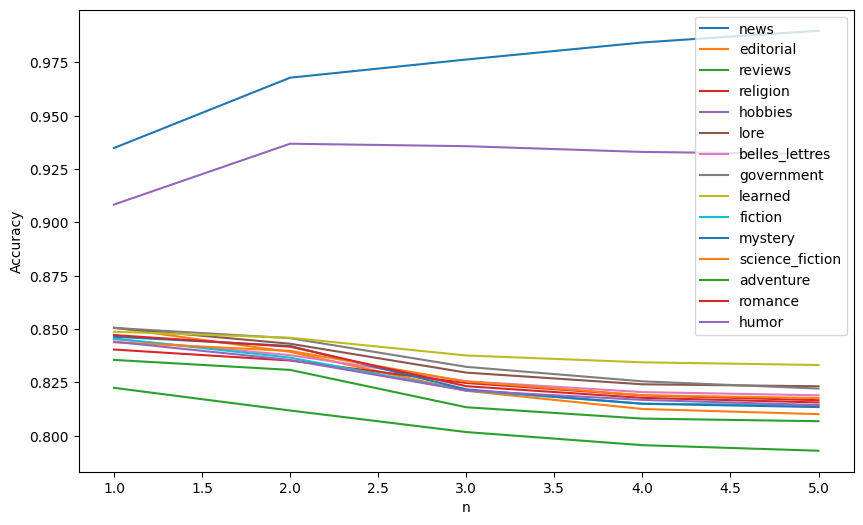

In [45]:
import matplotlib.pyplot as plt

# increase the size of the plot
plt.figure(figsize=(10, 6))
for category in test_categories:
    plt.plot(n_list, all_accuracies[category], label=category)
plt.xlabel('n')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1. Evaluate the bigram tagger
1. Make a function that receives a value of $n$ and a training set as parameters, and returns a PoS tagger with n-gram taggers for that $n$ with a successive backoff option that
1. Make a figure showing how the accuracy increases in the Brown corpus when $n$ is increased.

## Exercise 6

One measure of wordiness in a text is the lexical density. Lexical Density is a concept that comes from the idea that nouns and verbs convey meaning, and other words are only auxiliary. The Lexical Density is calculated for a sentence as the number of nouns and verbs, divided by the total number of words in the sentence.

Make a function that receives a sentence (and possibly a PoS tagger) as inputs and returns the sentence's lexical density.



In [50]:
def calculate_lexical_density(text):
    # only nouns and verbs contribute to the lexical density
    nouns = 0
    verbs = 0
    for _, tag in text:
        if tag.startswith('N'):
            nouns += 1
        elif tag.startswith('V'):
            verbs += 1
    return (nouns + verbs) / len(text)

# test the function
text = brown.tagged_sents(categories='science_fiction')[0]
print(text)
lexical_density = calculate_lexical_density(text)
print(lexical_density)


[('Now', 'RB'), ('that', 'CS'), ('he', 'PPS'), ('knew', 'VBD'), ('himself', 'PPL'), ('to', 'TO'), ('be', 'BE'), ('self', 'NN'), ('he', 'PPS'), ('was', 'BEDZ'), ('free', 'JJ'), ('to', 'TO'), ('grok', 'VB'), ('ever', 'QL'), ('closer', 'RBR'), ('to', 'IN'), ('his', 'PP$'), ('brothers', 'NNS'), (',', ','), ('merge', 'VB'), ('without', 'IN'), ('let', 'NN'), ('.', '.')]
0.2608695652173913
